In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Method for Categorical Breakdown of Features by Class

In [2]:
def plot_combined_bar(data, col1, col2):
    """
    This function generates a combined bar plot for all categories in col2, grouped by col1.
    
    Parameters:
    - data: DataFrame containing the data.
    - col1: The first categorical column (used for the x-axis).
    - col2: The second categorical column (used for the hue).
    """
    # Set a modern and aesthetically pleasing style
    sns.set(style="whitegrid")

    # Group the data by col1 and col2 and count occurrences
    grouped_data = data.groupby([col1, col2]).size().reset_index(name='count')

    # Create the bar plot
    plt.figure(figsize=(12, 4))
    sns.barplot(
        data=grouped_data,
        x=col1,
        y='count',
        hue=col2,
        palette='Set2',
        edgecolor='black'
    )
    
    # Customize the title and labels
    plt.title(f'Counts of {col1} by {col2}', fontsize=16, fontweight='bold', color='skyblue')
    plt.xlabel(col1, fontsize=14, fontweight='bold')
    plt.ylabel('Count', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)

    # Add gridlines to improve readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_combined_bar(data, 'cap_shape', 'cap_color')



# Function for Support Vector Machine (SVM) Classification with Different Kernels

In [3]:
def svm(X_train,X_test,y_train,y_test):
    # Step 2: Iterate over different SVM kernels
    kernels = ('linear', 'poly', 'rbf', 'sigmoid')

    for kernel in kernels:
        # Create the SVM model with the specified kernel
        model_svm_kern = SVC(kernel=kernel)
    
        # Fit the model on the training data transformed by PCA
        model_svm_kern.fit(X_train, y_train)
    
        # Make predictions on the PCA-transformed test data
        predictions_kern = model_svm_kern.predict(X_test)
    
        # Compute accuracy of the model
        accuracy_kern = accuracy_score(y_test, predictions_kern)
    
        # Print accuracy for each kernel
        print(f"\nKernel: {kernel}")
        print(f"Accuracy: {accuracy_kern:.4f}")
        print(classification_report(y_test,predictions_kern))
        cm = confusion_matrix(y_test, predictions_kern)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()


# Feature Distribution Visualization

In [4]:
def plot_feature_distributions(data, features):
    """
    Visualize distributions of specified features using histograms, box plots, and density plots.

    Parameters:
    - data: pandas DataFrame containing the dataset.
    - features: list of feature names to visualize.

    Returns:
    - None
    """
    num_features = len(features)
    fig, axes = plt.subplots(num_features, 3, figsize=(15, 5 * num_features))

    for i, feature in enumerate(features):
        # Histogram
        sns.histplot(data[feature], bins=30, ax=axes[i, 0], kde=False)
        axes[i, 0].set_title(f'Histogram of {feature}')
        axes[i, 0].set_xlabel(feature)
        axes[i, 0].set_ylabel('Frequency')

        # Box plot
        sns.boxplot(x=data[feature], ax=axes[i, 1])
        axes[i, 1].set_title(f'Box Plot of {feature}')
        axes[i, 1].set_xlabel(feature)

        # Density plot
        sns.kdeplot(data[feature], ax=axes[i, 2])
        axes[i, 2].set_title(f'Density Plot of {feature}')
        axes[i, 2].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_feature_distributions(data, ['feature1', 'feature2', 'feature3'])

# Dataset loading and preview

In [5]:
data = pd.read_csv('mushroom.csv')
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


Here’s a description of the columns :

1. **cap_shape**: The shape of the mushroom's cap (e.g., bell-shaped, convex, flat).
2. **cap_surface**: The texture or surface appearance of the mushroom's cap (e.g., smooth, scaly, fibrous).
3. **cap_color**: The color of the mushroom's cap.
4. **bruises**: Whether the mushroom bruises or does not bruise when touched.
5. **odor**: The smell of the mushroom (e.g., almond, anise, foul).
6. **gill_attachment**: How the gills of the mushroom are attached to the stem (e.g., free, attached).
7. **gill_spacing**: The spacing of the gills on the underside of the mushroom cap (e.g., close, crowded).
8. **gill_size**: The size of the gills (e.g., broad, narrow).
9. **gill_color**: The color of the gills.
10. **stalk_shape**: The shape of the mushroom's stalk (e.g., enlarging, tapering).
11. **stalk_root**: The type of root of the mushroom's stalk (e.g., bulbous, equal).
12. **stalk_surface_above_ring**: The surface texture of the stalk above the ring.
13. **stalk_surface_below_ring**: The surface texture of the stalk below the ring.
14. **stalk_color_above_ring**: The color of the stalk above the ring.
15. **stalk_color_below_ring**: The color of the stalk below the ring.
16. **veil_type**: The type of veil that covers the mushroom when young (usually universal veil).
17. **veil_color**: The color of the veil.
18. **ring_number**: The number of rings on the stalk (e.g., none, one, two).
19. **ring_type**: The type of ring on the stalk (e.g., flaring, large, pendant).
20. **spore_print_color**: The color of the mushroom's spore print (e.g., black, white, brown).
21. **population**: The population size of the mushroom (e.g., abundant, clustered).
22. **habitat**: The type of habitat where the mushroom is found (e.g., woods, meadows).
23. **class**: Classification of the mushroom (edible or poisonous).
24. **stalk_height**: The height of the mushroom's stalk (numerical, in centimeters).
25. **cap_diameter**: The diameter of the mushroom's cap (nues for describing mushrooms.

# Exploratory Data Analysis and data preprocessing

In [6]:
data.drop(columns='Unnamed: 0',inplace=True) # removing unnecessary column

In [7]:
data.shape

(2000, 25)

In [8]:
data.duplicated().sum()

1024

In [9]:
data.drop_duplicates(inplace=True) # removing duplicate rows

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 976 non-null    object 
 1   cap_surface               976 non-null    object 
 2   cap_color                 976 non-null    object 
 3   bruises                   976 non-null    object 
 4   odor                      976 non-null    object 
 5   gill_attachment           976 non-null    object 
 6   gill_spacing              976 non-null    object 
 7   gill_size                 976 non-null    object 
 8   gill_color                976 non-null    object 
 9   stalk_shape               976 non-null    object 
 10  stalk_root                976 non-null    object 
 11  stalk_surface_above_ring  976 non-null    object 
 12  stalk_surface_below_ring  976 non-null    object 
 13  stalk_color_above_ring    976 non-null    object 
 14  stalk_color_be

In [11]:
data.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [12]:
data['odor'].value_counts()

odor
foul        126
anise       119
fishy       111
musty       111
spicy       110
creosote    107
pungent     101
almond       98
none         93
Name: count, dtype: int64

In [13]:
# Convert all categorical columns to lowercase
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.lower()


In [14]:
data[data['odor'].isnull()]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter


In [15]:
# Replace None with np.nan
data.replace({None: np.nan,'none':np.nan}, inplace=True)

In [16]:
data.isnull().sum()

cap_shape                     0
cap_surface                   0
cap_color                     0
bruises                       0
odor                         93
gill_attachment               0
gill_spacing                  0
gill_size                     0
gill_color                    0
stalk_shape                   0
stalk_root                    0
stalk_surface_above_ring      0
stalk_surface_below_ring      0
stalk_color_above_ring        0
stalk_color_below_ring        0
veil_type                     0
veil_color                    0
ring_number                 342
ring_type                   113
spore_print_color             0
population                    0
habitat                       0
class                         0
stalk_height                  0
cap_diameter                  0
dtype: int64

In [17]:
data.drop(columns=['ring_number','ring_type'],inplace=True) # removing null value column where lot of null value are present
data.dropna(inplace=True) # removing null value rows just for odor

# Exploring Feature Diversity Within Each Target

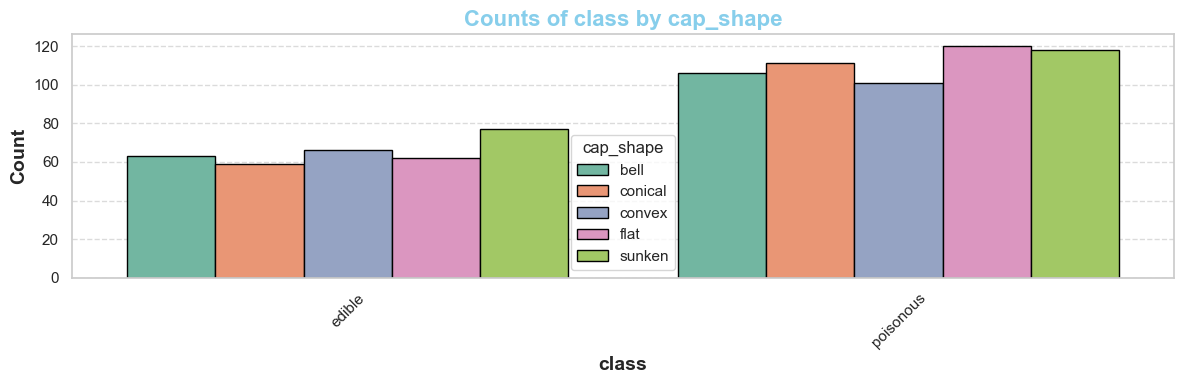

In [18]:
plot_combined_bar(data,'class','cap_shape')

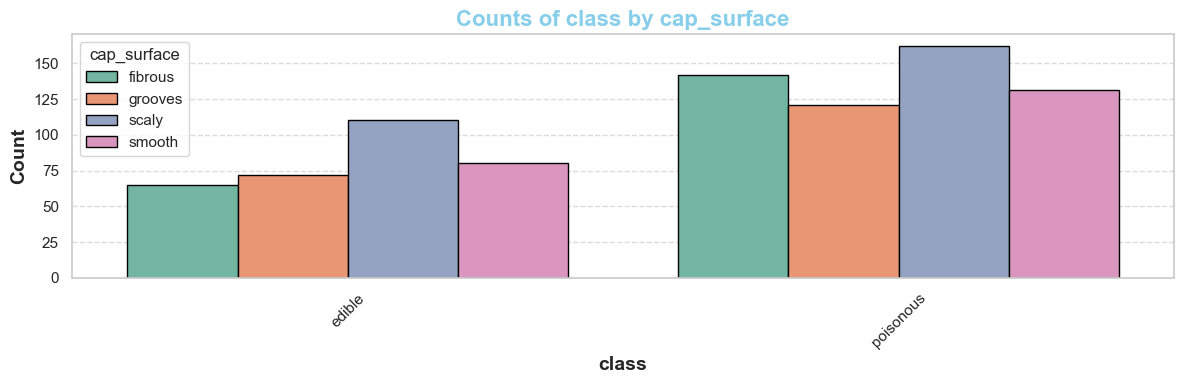

In [19]:
plot_combined_bar(data,'class','cap_surface')

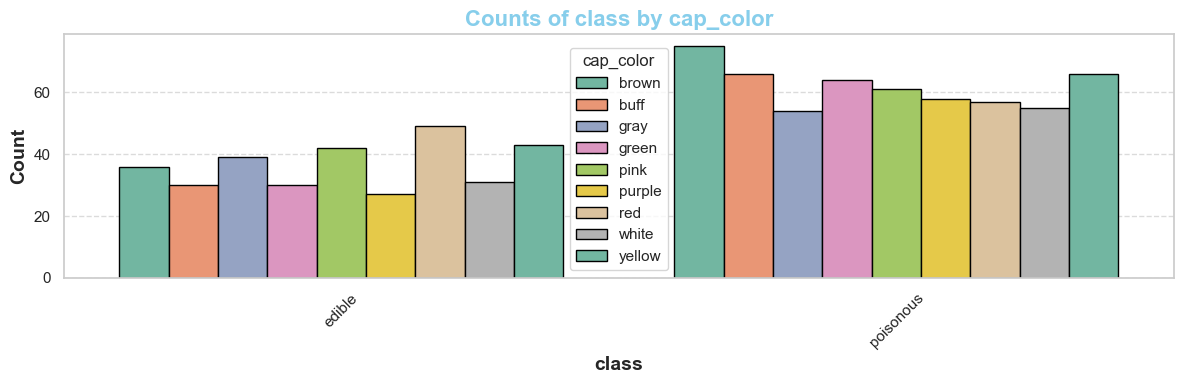

In [20]:
plot_combined_bar(data,'class','cap_color')

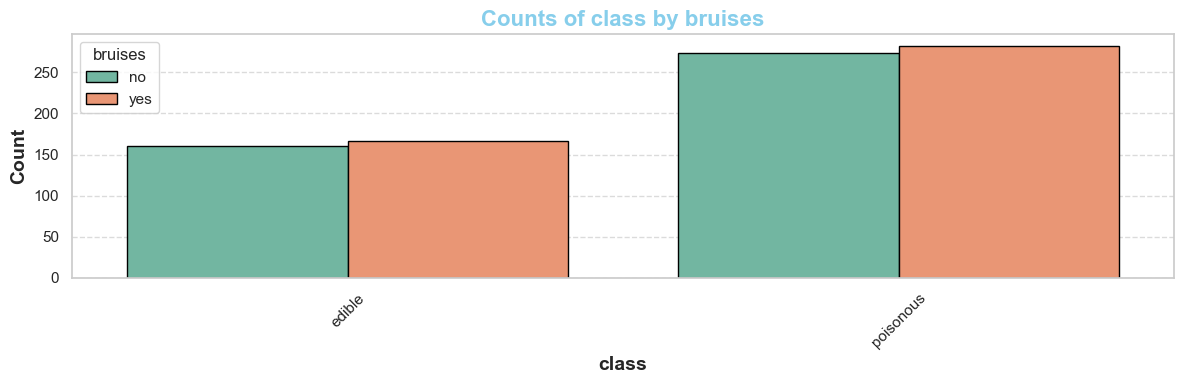

In [21]:
plot_combined_bar(data,'class','bruises')

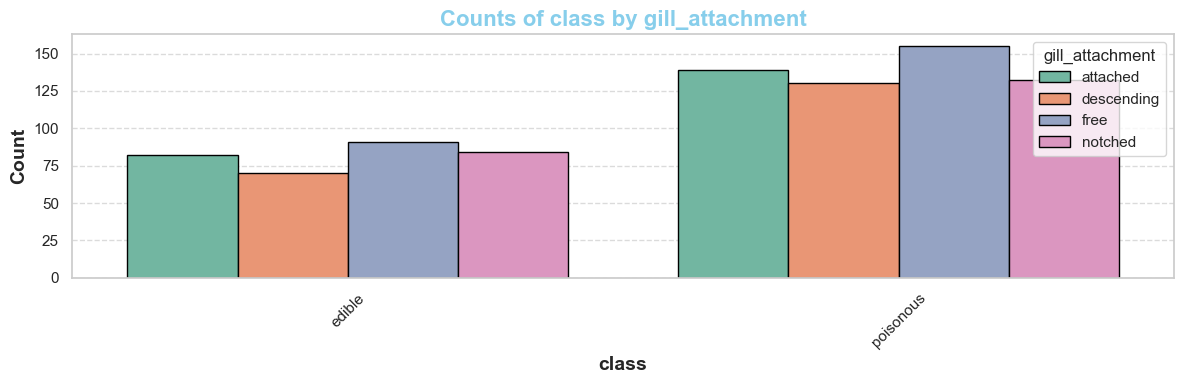

In [22]:
plot_combined_bar(data,'class','gill_attachment')

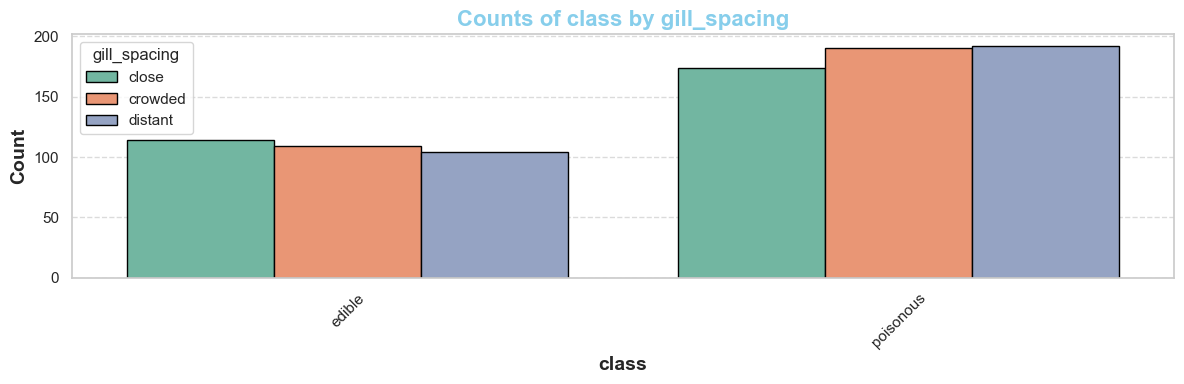

In [23]:
plot_combined_bar(data,'class','gill_spacing')

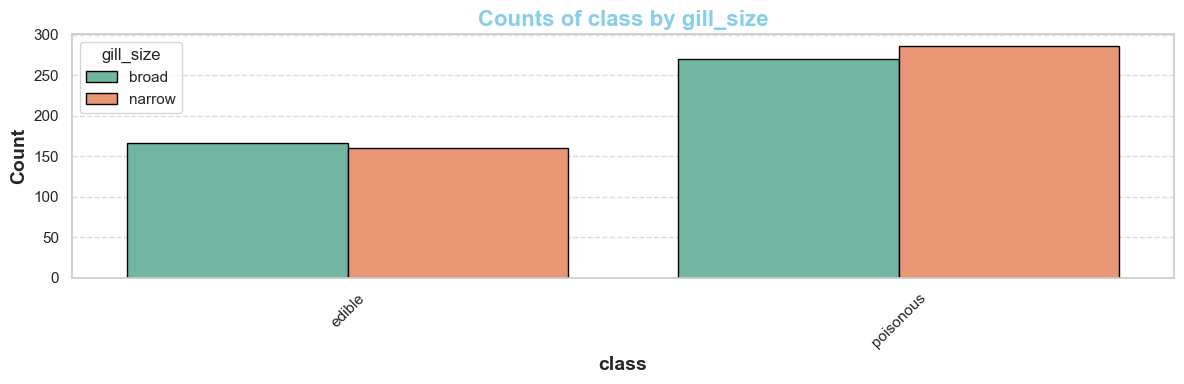

In [24]:
plot_combined_bar(data,'class','gill_size')

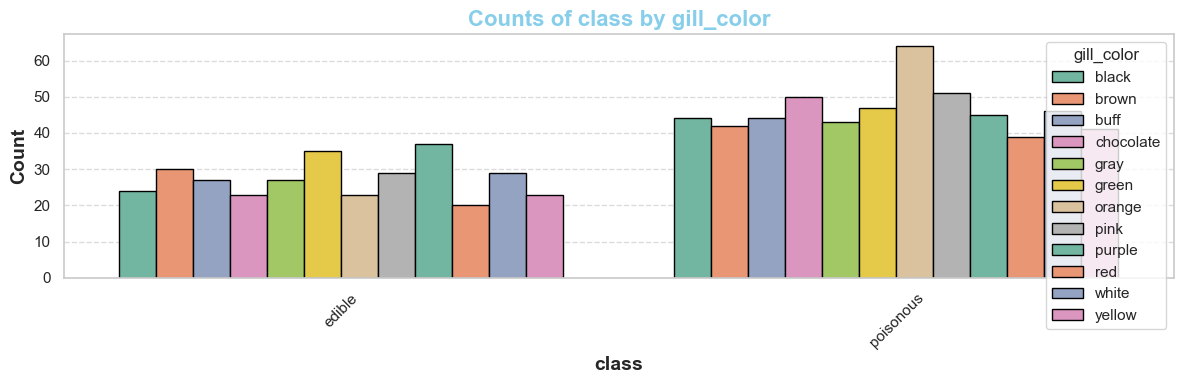

In [25]:
plot_combined_bar(data,'class','gill_color')

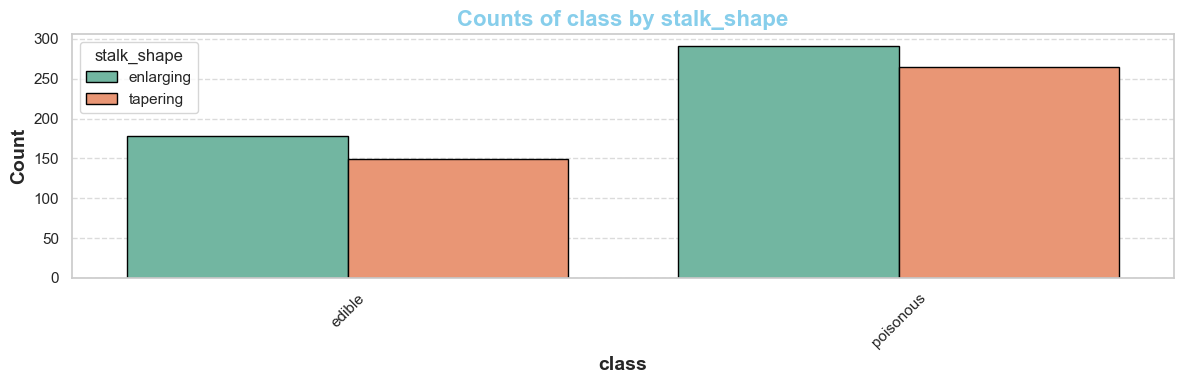

In [26]:
plot_combined_bar(data,'class','stalk_shape')

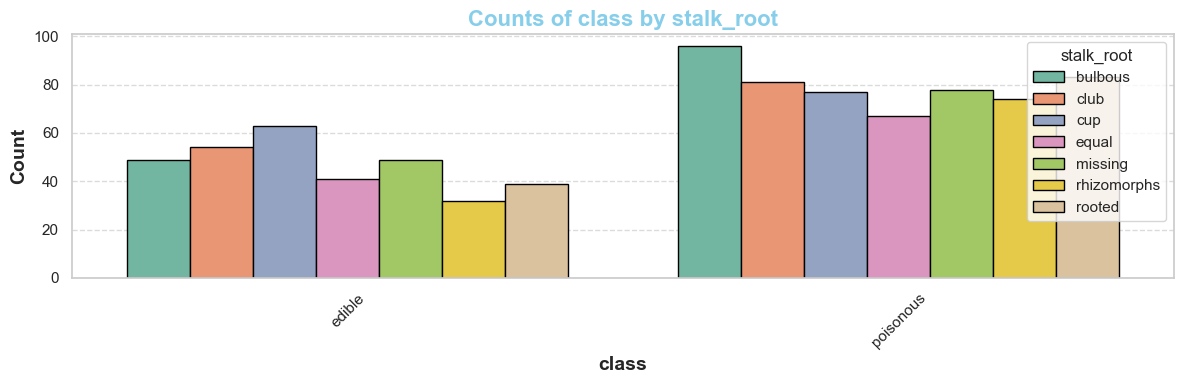

In [27]:
plot_combined_bar(data,'class','stalk_root')

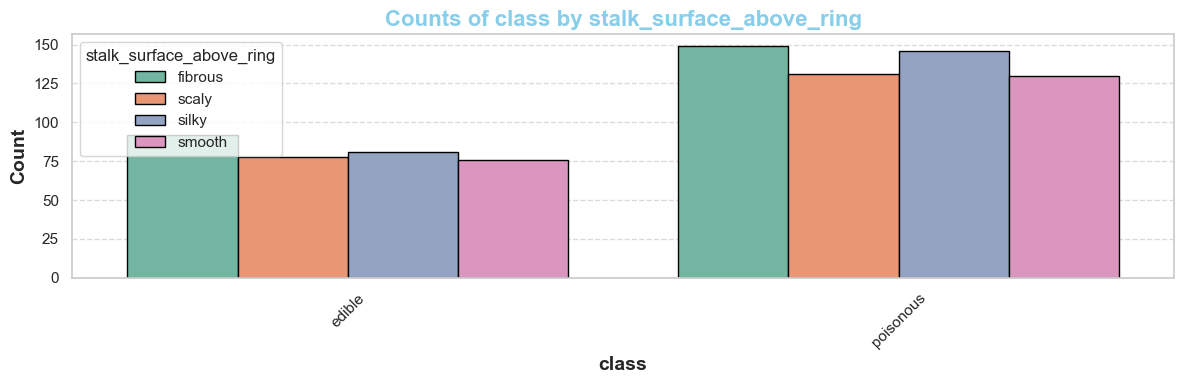

In [28]:
plot_combined_bar(data,'class','stalk_surface_above_ring')

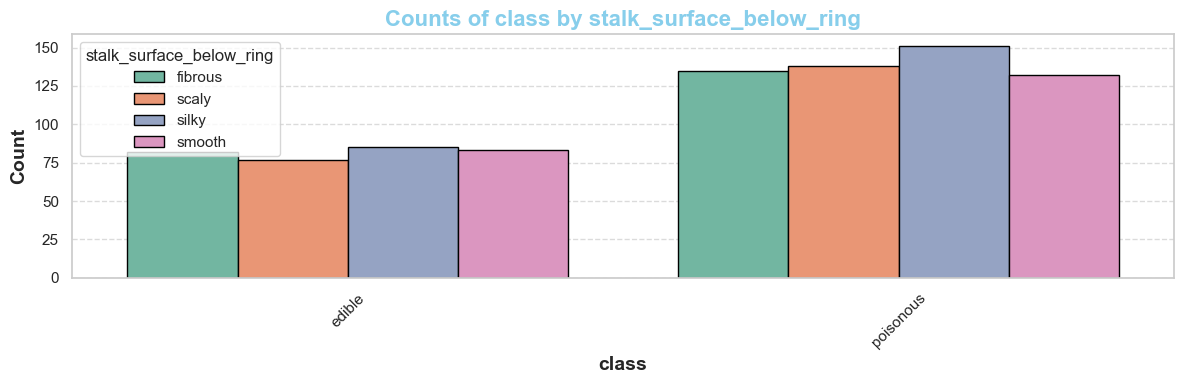

In [29]:
plot_combined_bar(data,'class','stalk_surface_below_ring')

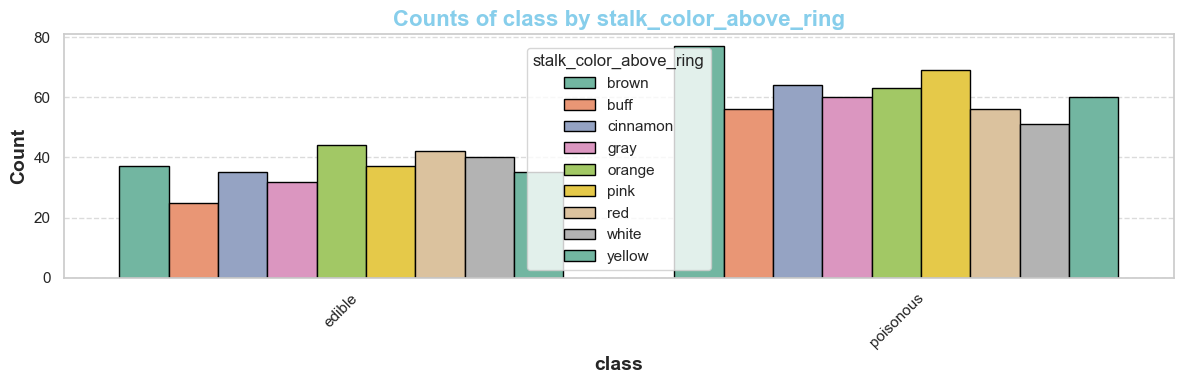

In [30]:
plot_combined_bar(data,'class','stalk_color_above_ring')

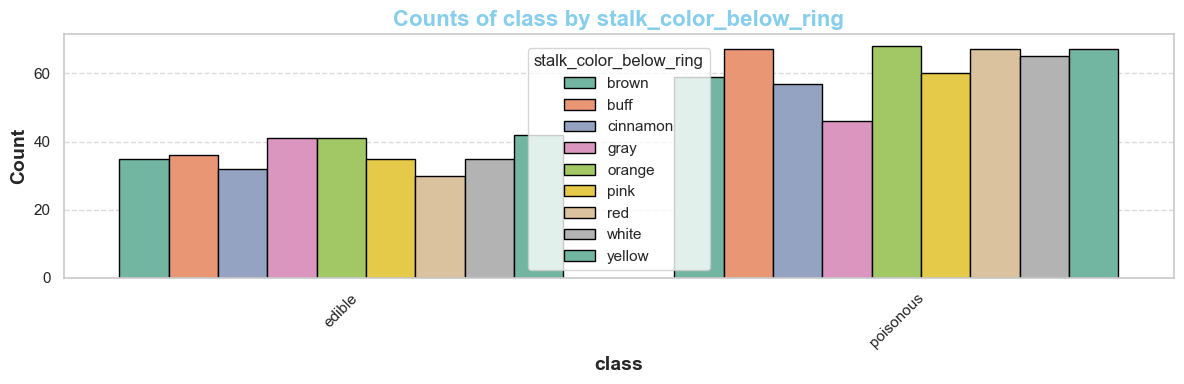

In [31]:
plot_combined_bar(data,'class','stalk_color_below_ring')

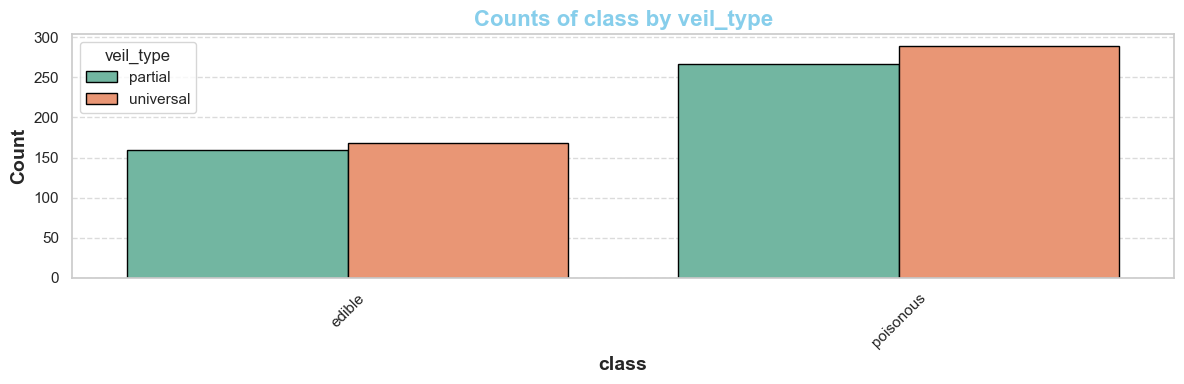

In [32]:
plot_combined_bar(data,'class','veil_type')

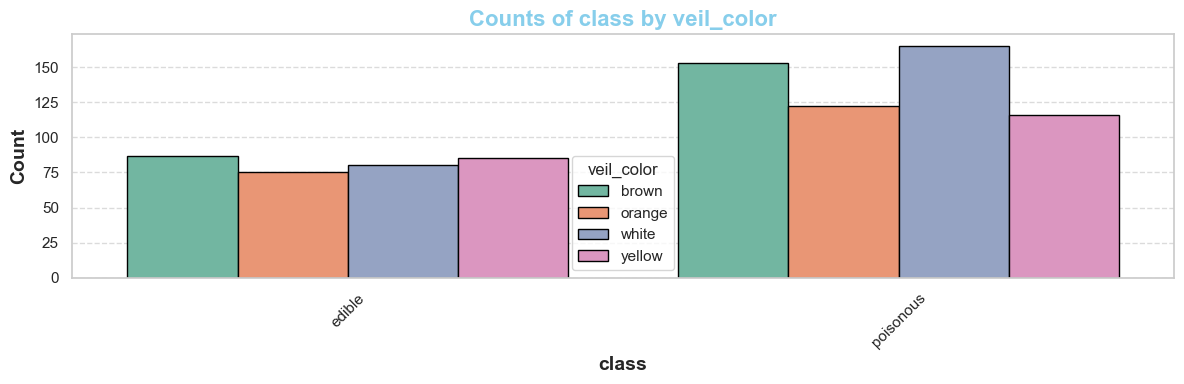

In [33]:
plot_combined_bar(data,'class','veil_color')

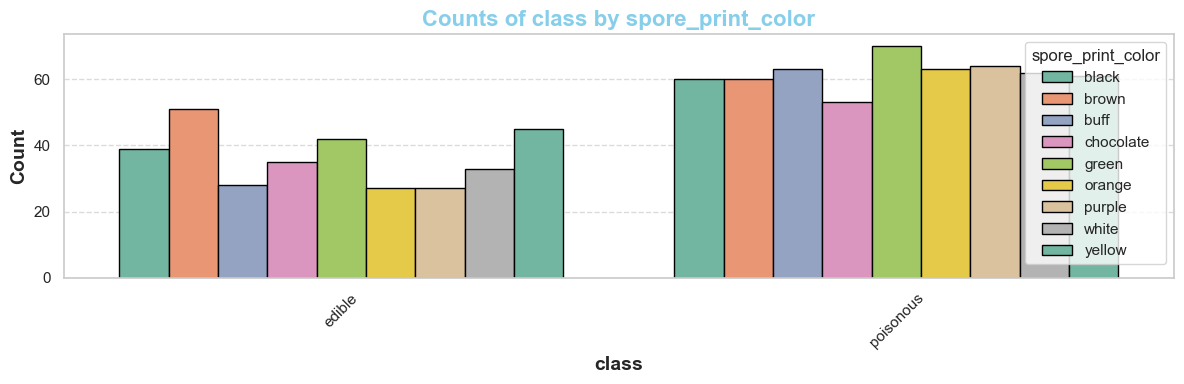

In [34]:
plot_combined_bar(data,'class','spore_print_color')

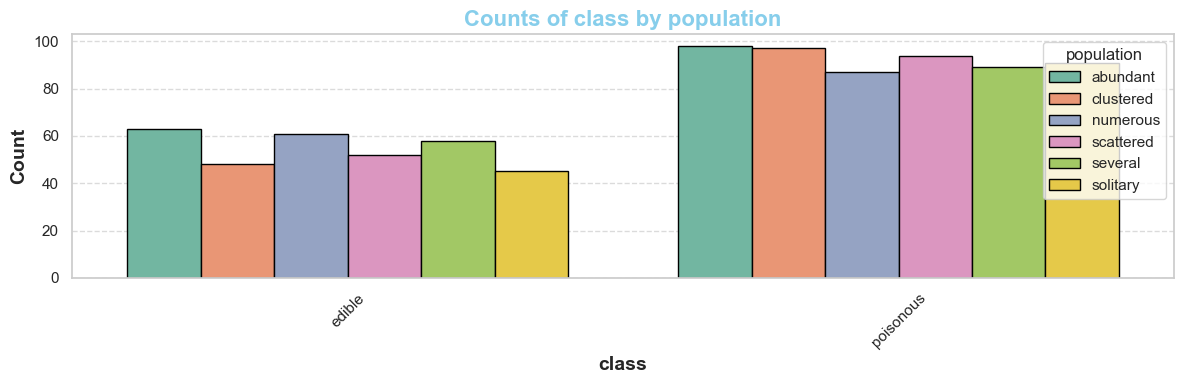

In [35]:
plot_combined_bar(data,'class','population')

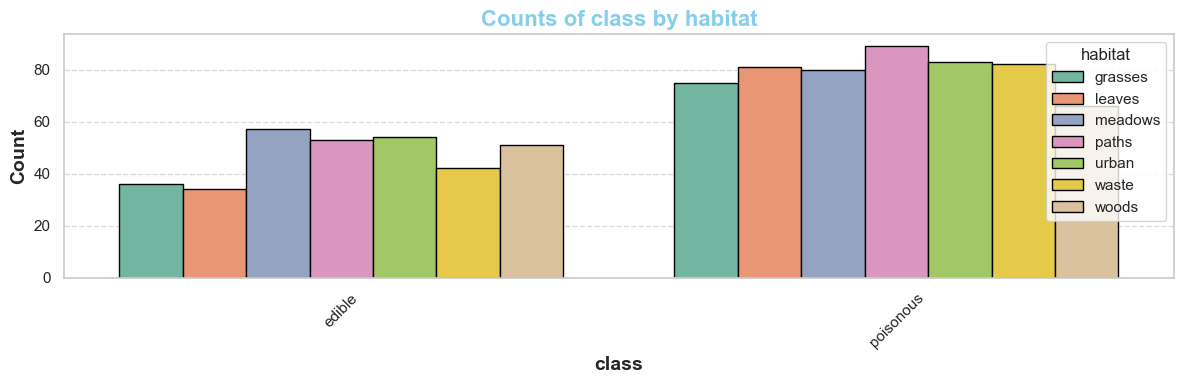

In [36]:
plot_combined_bar(data,'class','habitat')

In [37]:
data.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color',
       'spore_print_color', 'population', 'habitat', 'class', 'stalk_height',
       'cap_diameter'],
      dtype='object')

# Encoding

In [38]:
# Create a LabelEncoder
le = LabelEncoder()

# Select only categorical columns (dtype 'object')
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,8,1,4,1,14.037532,12.545245


# check the distribution of features

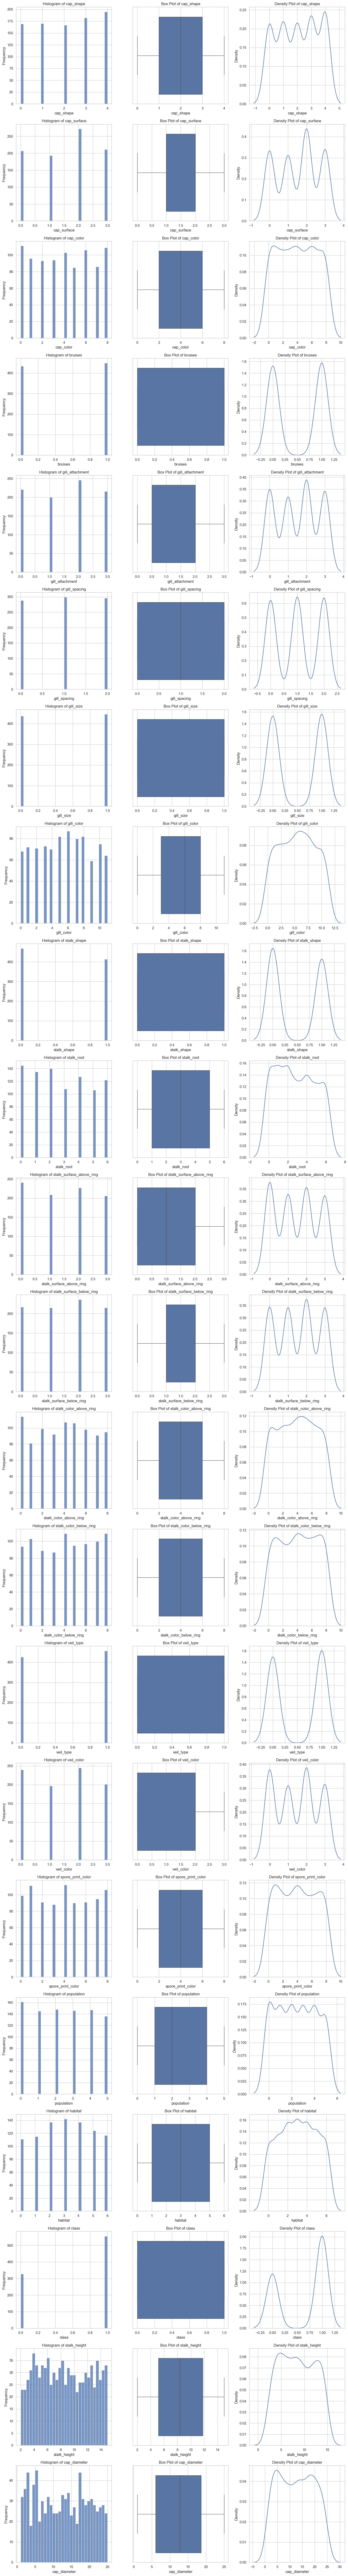

In [39]:
plot_feature_distributions(data, ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'gill_attachment',
       'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
       'stalk_surface_above_ring', 'stalk_surface_below_ring',
       'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
       'veil_color', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'])
    
    

# check the target distribution

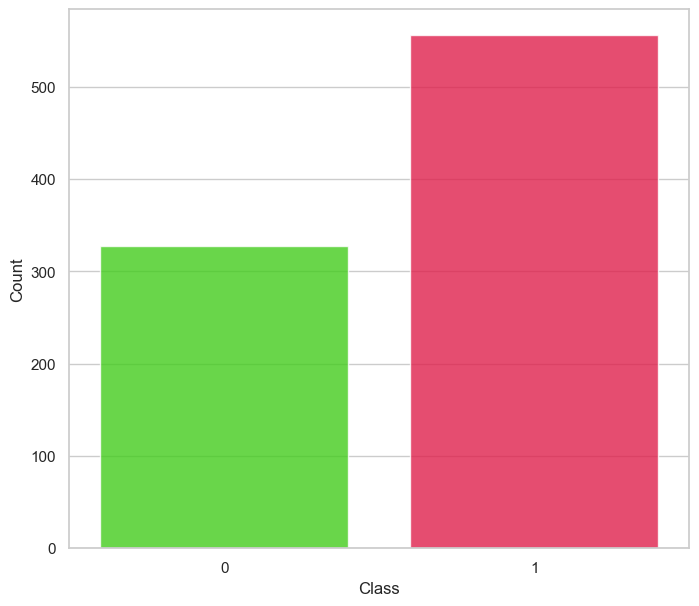

In [40]:
count = data['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, hue=count.index, alpha=0.8, palette="prism", legend=False)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

# check the corelation of column

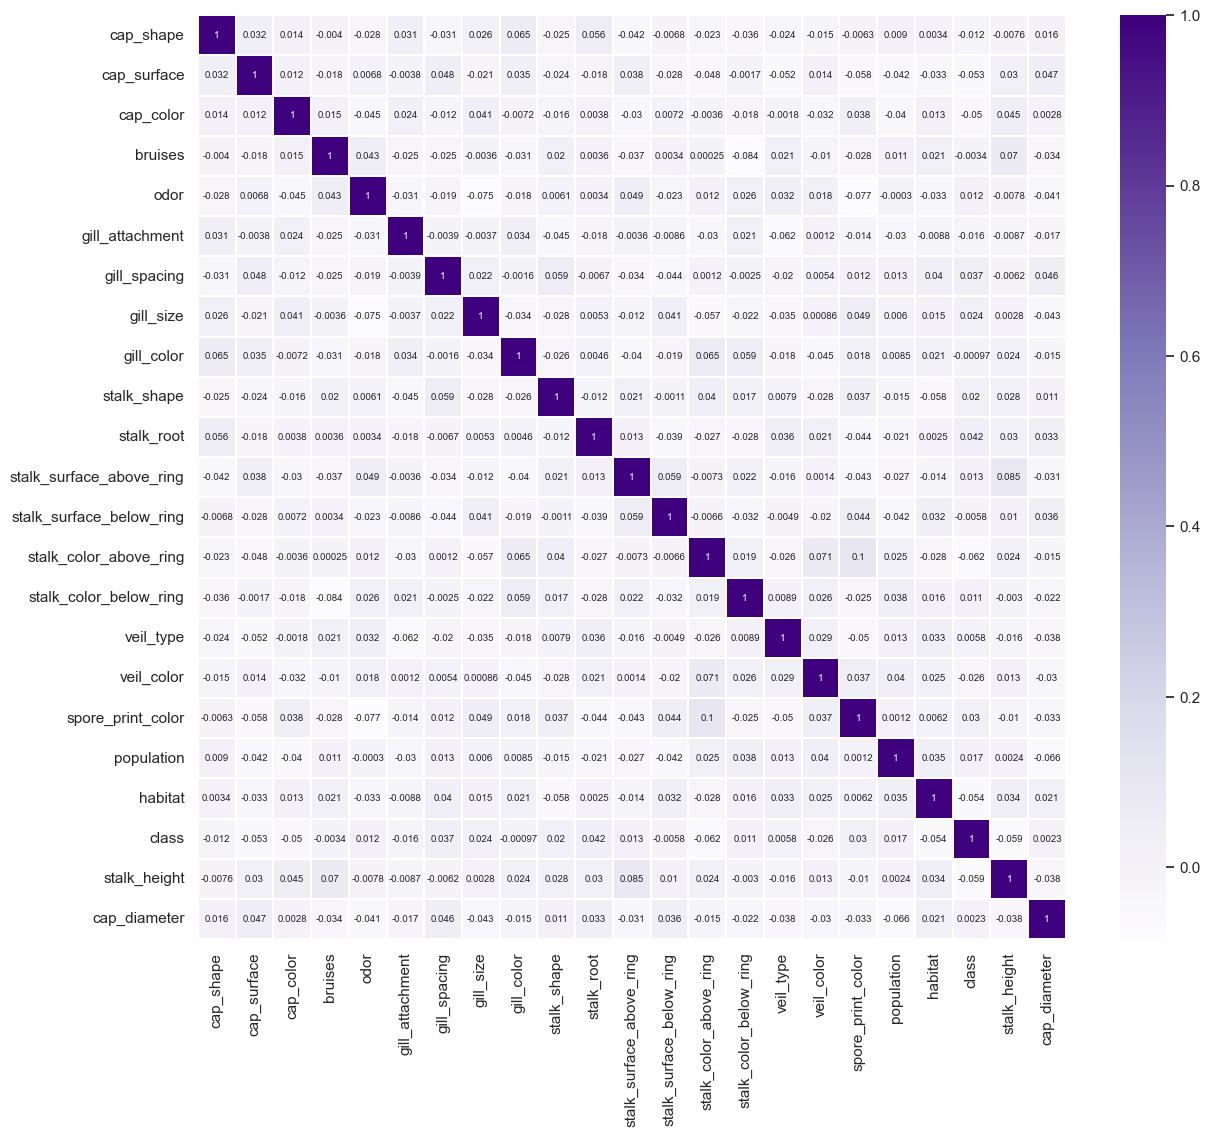

In [41]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

In [42]:
data.dropna(inplace=True)

In [43]:
data[['class', 'gill_color']].groupby(['gill_color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill_color,class
6,6,0.735632
3,3,0.684932
9,9,0.661017
0,0,0.647059
11,11,0.640625
7,7,0.637500
2,2,0.619718
4,4,0.614286
10,10,0.613333
1,1,0.583333


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 883 non-null    int32  
 1   cap_surface               883 non-null    int32  
 2   cap_color                 883 non-null    int32  
 3   bruises                   883 non-null    int32  
 4   odor                      883 non-null    int32  
 5   gill_attachment           883 non-null    int32  
 6   gill_spacing              883 non-null    int32  
 7   gill_size                 883 non-null    int32  
 8   gill_color                883 non-null    int32  
 9   stalk_shape               883 non-null    int32  
 10  stalk_root                883 non-null    int32  
 11  stalk_surface_above_ring  883 non-null    int32  
 12  stalk_surface_below_ring  883 non-null    int32  
 13  stalk_color_above_ring    883 non-null    int32  
 14  stalk_color_be

# Split the data into traain and test

In [45]:
X = data.drop(['class'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# check the association between columns

In [46]:
def chi_square_test(data, features, target, alpha=0.05):
    """Perform chi-square test for association between multiple categorical features and a target."""
    results = {}
    for feature in features:
        # Create a contingency table
        contingency_table = pd.crosstab(data[feature], data[target])
        # Perform the chi-square test
        chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
        # Store the results in the dictionary
        results[feature] = {
            'chi2_statistic': chi2_stat,
            'p_value': p_value,
            'null_hypothesis': f'No association between {feature} and {target}',
            'alternative_hypothesis': f'There is an association between {feature} and {target}',
            'hypothesis': 'Reject' if p_value < alpha else 'Accept'
        }
    return results

In [47]:
chi_square_test(data,['cap_shape', 'cap_surface', 'cap_color', 'bruises', 
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'spore_print_color', 'population', 'habitat',
       'stalk_height', 'cap_diameter'],'class')

{'cap_shape': {'chi2_statistic': 2.033241982002109,
  'p_value': 0.729644640663883,
  'null_hypothesis': 'No association between cap_shape and class',
  'alternative_hypothesis': 'There is an association between cap_shape and class',
  'hypothesis': 'Accept'},
 'cap_surface': {'chi2_statistic': 4.2471980342141045,
  'p_value': 0.2359787447477791,
  'null_hypothesis': 'No association between cap_surface and class',
  'alternative_hypothesis': 'There is an association between cap_surface and class',
  'hypothesis': 'Accept'},
 'cap_color': {'chi2_statistic': 10.180471647253743,
  'p_value': 0.2525870240155477,
  'null_hypothesis': 'No association between cap_color and class',
  'alternative_hypothesis': 'There is an association between cap_color and class',
  'hypothesis': 'Accept'},
 'bruises': {'chi2_statistic': 0.000962337031781435,
  'p_value': 0.9752523475196413,
  'null_hypothesis': 'No association between bruises and class',
  'alternative_hypothesis': 'There is an association bet

# Balance the data using smote

In [48]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply logistic regression just for checking accuracy

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 60.67%


In [50]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.29      0.06      0.10        32
           1       0.63      0.91      0.75        57

    accuracy                           0.61        89
   macro avg       0.46      0.49      0.43        89
weighted avg       0.51      0.61      0.52        89



# Apply SVM model


Kernel: linear
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


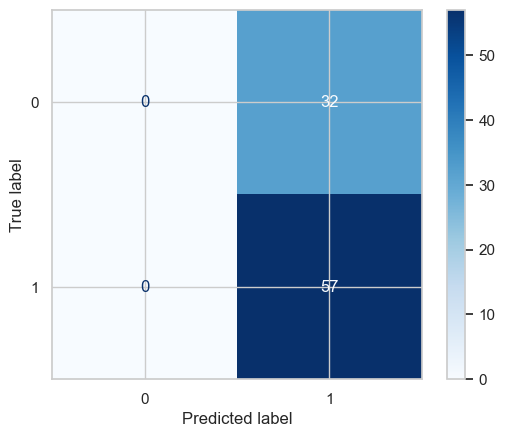


Kernel: poly
Accuracy: 0.6517
              precision    recall  f1-score   support

           0       0.67      0.06      0.11        32
           1       0.65      0.98      0.78        57

    accuracy                           0.65        89
   macro avg       0.66      0.52      0.45        89
weighted avg       0.66      0.65      0.54        89



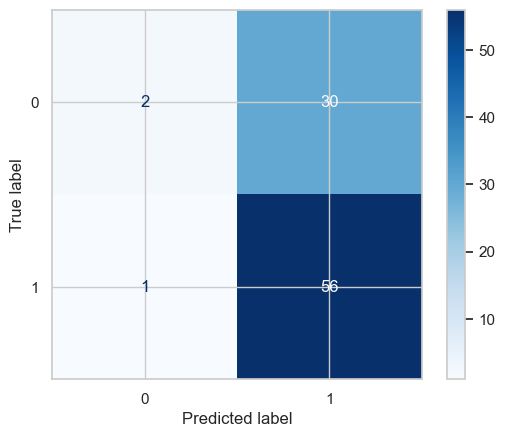


Kernel: rbf
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


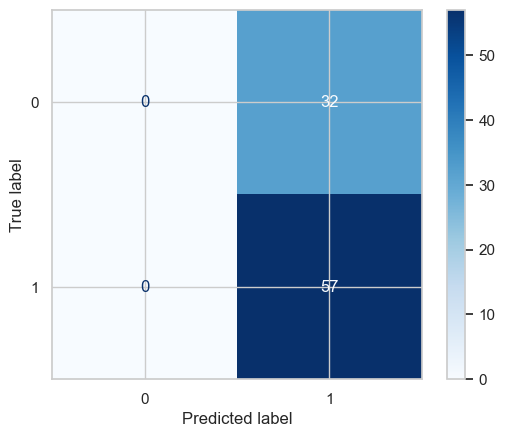


Kernel: sigmoid
Accuracy: 0.5056
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        32
           1       0.61      0.65      0.63        57

    accuracy                           0.51        89
   macro avg       0.45      0.45      0.45        89
weighted avg       0.49      0.51      0.50        89



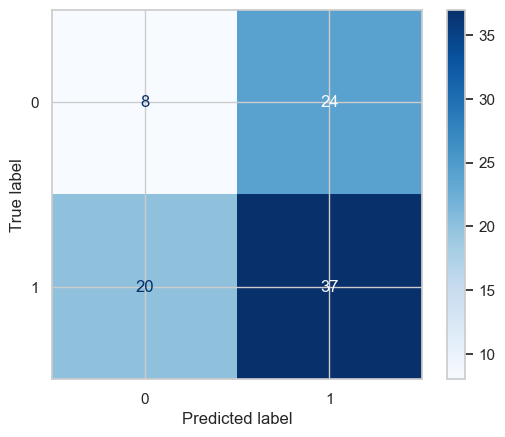

In [51]:
svm(X_train,X_test, y_train,y_test)

The results show the performance of different SVM kernels—**linear**, **poly** (polynomial), **rbf** (radial basis function), and **sigmoid**—on the classification task. Here’s a summary and analysis for each:

### **Kernel: Linear**
- **Accuracy**: 0.6404
- **Precision/Recall**:
  - Class `0`: Precision and recall are both 0, meaning the classifier failed to identify any samples from this class.
  - Class `1`: It has a high recall of 1.0, meaning it successfully identified all class `1` samples but has average precision (0.64), indicating some false positives.
- **F1-Score**:
  - F1-score is 0.78 for class `1`, but 0 for class `0`.

### **Kernel: Polynomial**
- **Accuracy**: 0.6517
- **Precision/Recall**:
  - Class `0`: Precision is decent (0.67), but recall is very low (0.06), meaning very few class `0` samples were correctly identified.
  - Class `1`: High recall (0.98) and better balance between precision (0.65), leading to a decent F1-score of 0.78.
- **F1-Score**:
  - Still favors class `1` significantly, with a high F1-score.

### **Kernel: RBF**
- **Accuracy**: 0.6404 (same as linear kernel)
- **Precision/Recall**:
  - Class `0`: No samples identified correctly, similar to the linear kernel.
  - Class `1`: Recall is perfect, but precision remains moderate, indicating a bias towards class `1`.
- **F1-Score**: Similar to the linear kernel, skewed towards class `1`.

### **Kernel: Sigmoid**
- **Accuracy**: 0.5056
- **Precision/Recall**:
  - Class `0`: Low precision (0.29) and low recall (0.25), indicating poor performance in identifying class `0`.
  - Class `1`: Moderate precision (0.61) and recall (0.65), but not as strong as other kernels.
- **F1-Score**: More balanced between the two classes, though overall performance is weaker than other kernels.

### **Key Observations**:
- The **linear** and **rbf** kernels are performing similarly, favoring class `1` entirely, but ignoring class `0`. This may suggest that the dataset is imbalanced or that these kernels are not well-suited for distinguishing class `0`.
- The **polynomial** kernel slightly improves over the linear and rbf kernels by identifying some class `0` samples, but still performs poorly for class `0`.
- The **sigmoid** kernel is the least accurate and struggles with both classes, although it shows more balance between class `0` and class `1` than other kernels.


# Identifing Most inportant feature

                   Feature  Importance
20            stalk_height    0.104656
21            cap_diameter    0.101696
8               gill_color    0.063858
17       spore_print_color    0.054906
2                cap_color    0.054653
13  stalk_color_above_ring    0.053852
4                     odor    0.052635
10              stalk_root    0.052397
14  stalk_color_below_ring    0.052249
19                 habitat    0.050350


<Axes: title={'center': 'Top 10 Important Features'}, ylabel='Feature'>

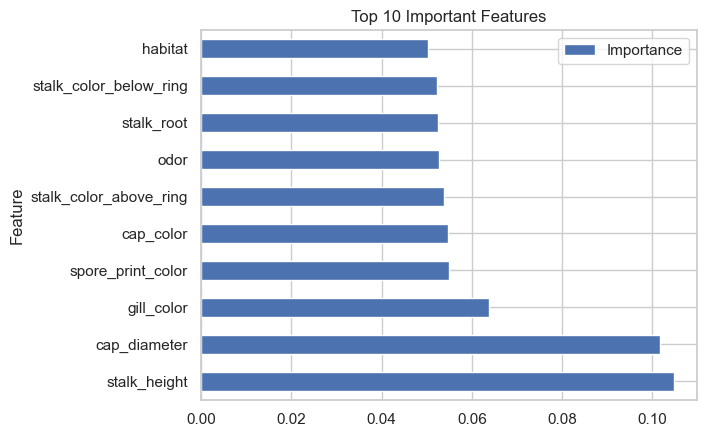

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Step 1: Create and fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Step 2: Get the feature importances
feature_importances = clf.feature_importances_

# Step 3: Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Step 4: Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 5: Display top 10 most important features
print(importance_df.head(10))

# Optional: Plot the feature importances
importance_df.set_index('Feature').head(10).plot(kind='barh', title='Top 10 Important Features')



### Top 10 Important Features:
1. **stalk_height**: 0.104656
2. **cap_diameter**: 0.101696
3. **gill_color**: 0.063858
4. **spore_print_color**: 0.054906
5. **cap_color**: 0.054653
6. **stalk_color_above_ring**: 0.053852
7. **odor**: 0.052635
8. **stalk_root**: 0.052397
9. **stalk_color_below_ring**: 0.052249
10. **habitat**: 0.050350

The features are ranked by their importance, showing that **stalk_height** and **cap_diameter** are the most influential features in the model.


# appying PCA

Explained variance by each component: [0.38411594 0.11083814]


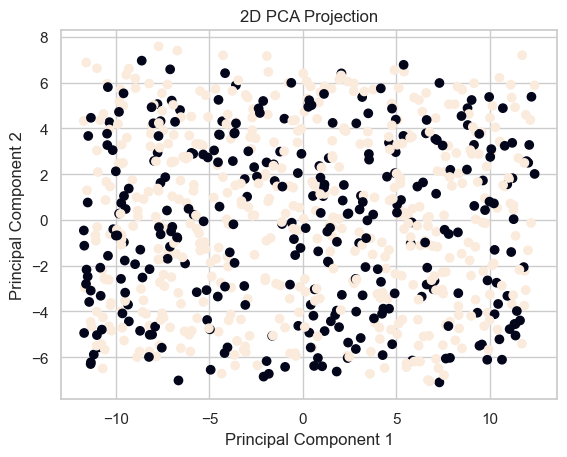

In [53]:
from sklearn.decomposition import PCA
# Step 1: Initialize PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization (or choose n_components for your case)

# Step 2: Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3: Check the amount of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

# Optional: Plot the 2D projection (if reducing to 2 components)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)  # Assuming y_train has the labels for color coding
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()


# Check the model performance on pca data


Kernel: linear
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


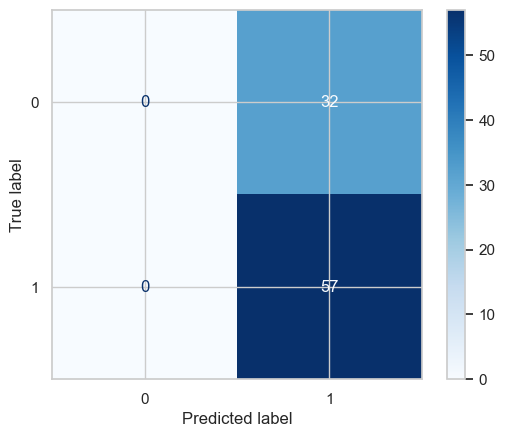


Kernel: poly
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


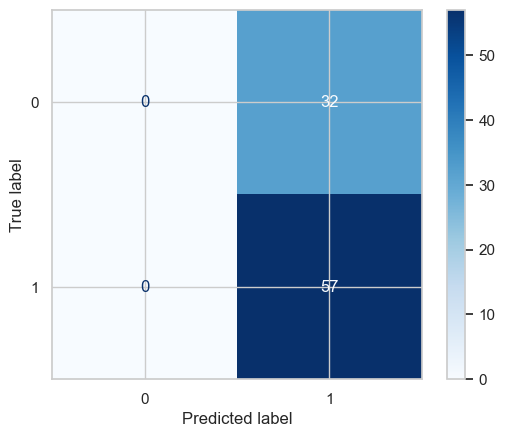


Kernel: rbf
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


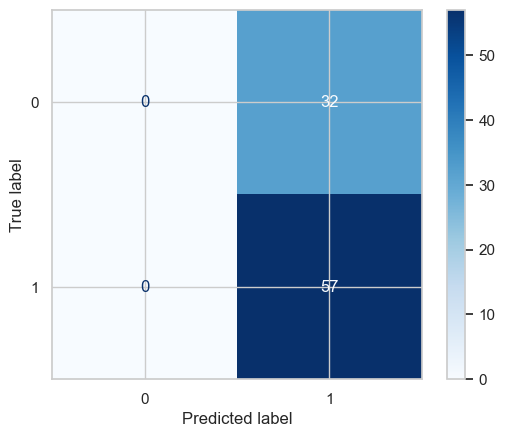


Kernel: sigmoid
Accuracy: 0.5056
              precision    recall  f1-score   support

           0       0.33      0.38      0.35        32
           1       0.62      0.58      0.60        57

    accuracy                           0.51        89
   macro avg       0.48      0.48      0.48        89
weighted avg       0.52      0.51      0.51        89



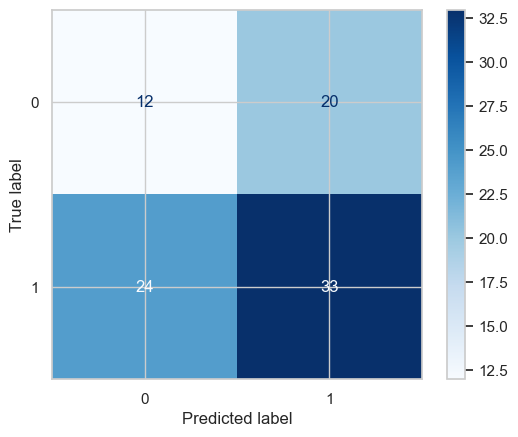

In [54]:
svm(X_train_pca,X_test_pca,y_train,y_test)


### **Kernel: Linear**
- **Accuracy**: 0.6404
- **Precision and Recall**:
  - Class `0`: Precision and recall are 0, meaning the model couldn't identify any samples from class `0`.
  - Class `1`: High recall (1.00), meaning the model correctly identified all samples from class `1`, but precision is moderate (0.64), suggesting some false positives.
- **F1-Score**:
  - Class `1` has a high F1-score (0.78), but class `0` is ignored.

### **Kernel: Polynomial**
- **Accuracy**: 0.6404 (same as linear kernel)
- **Precision and Recall**:
  - Class `0`: Precision and recall are 0, similar to the linear kernel.
  - Class `1`: Perfect recall (1.00) with precision of 0.64, indicating similar performance to the linear kernel.
- **F1-Score**: Heavily favors class `1`, while ignoring class `0`.

### **Kernel: RBF**
- **Accuracy**: 0.6404 (same as linear and polynomial)
- **Precision and Recall**:
  - Class `0`: Precision and recall are 0, similar to the other kernels.
  - Class `1`: Perfect recall and moderate precision (0.64), just like linear and poly.
- **F1-Score**: Same trend as previous kernels, heavily biased towards class `1`.

### **Kernel: Sigmoid**
- **Accuracy**: 0.5056 (lower than other kernels)
- **Precision and Recall**:
  - Class `0`: Precision (0.33) and recall (0.38) are slightly better, but still low.
  - Class `1`: Precision (0.62) and recall (0.58) are more balanced, but lower than the other kernels.
- **F1-Score**:
  - F1-scores are more balanced between classes `0` and `1`, but performance is weaker compared to the other kernels.

### **Overall Analysis**:
- **Bias Towards Class `1`**: All kernels except sigmoid heavily favor class `1`, completely ignoring class `0`. This suggests a potential issue with class imbalance, where the model struggles to recognize class `0`.
- **Sigmoid Kernel**: Though it has the lowest overall accuracy, it performs better in identifying both classandle imbalanced data more effectively.

# Applying k-fold cross validation

In [55]:
from sklearn.model_selection import KFold, cross_val_score
# Step 1: Initialize KFold
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Step 2: Create the SVM model
model = SVC(kernel='rbf')  # You can change the kernel to 'linear', 'poly', etc.

# Step 3: Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Step 4: Print the results
print(f"Cross-validated scores: {scores}")
print(f"Mean accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Cross-validated scores: [0.62711864 0.65536723 0.64971751 0.625      0.59090909]
Mean accuracy: 0.6296 ± 0.0228



### **Cross-Validated Scores**:
- The model's accuracy across the 5 different validation sets is as follows:
  - Fold 1: 0.6271
  - Fold 2: 0.6554
  - Fold 3: 0.6497
  - Fold 4: 0.6250
  - Fold 5: 0.5909

### **Mean Accuracy**:
- The **mean accuracy** across all folds is **0.6296**.
- The **standard deviation** of accuracy is **± 0.0228**.

### **Interpretation**:
- **Consistency**: The accuracies across folds are relatively consistent, with a small standard deviation (0.0228), indicating that the model is performing similarly across the different splits of data.
- **Performance**: The overall mean accuracy of 0.6296 indicates the model is achieving moderate performance on this dataset, which coance between the folds.

# Apply SVM on Most important features

In [56]:
data2 = data[['cap_diameter','stalk_height','gill_color','stalk_color_above_ring','stalk_color_below_ring',
              'spore_print_color','cap_color','stalk_root',
             'habitat','population']]

In [57]:
X = data2
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


Kernel: linear
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


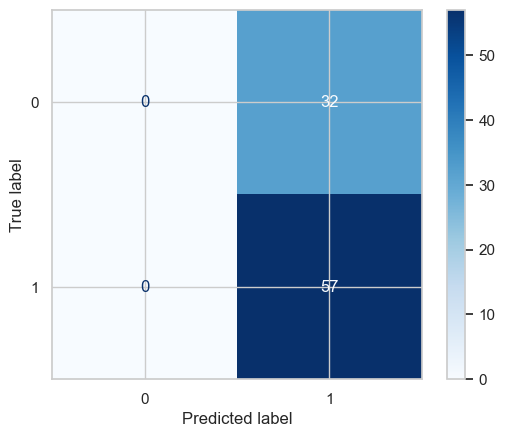


Kernel: poly
Accuracy: 0.6517
              precision    recall  f1-score   support

           0       0.60      0.09      0.16        32
           1       0.65      0.96      0.78        57

    accuracy                           0.65        89
   macro avg       0.63      0.53      0.47        89
weighted avg       0.64      0.65      0.56        89



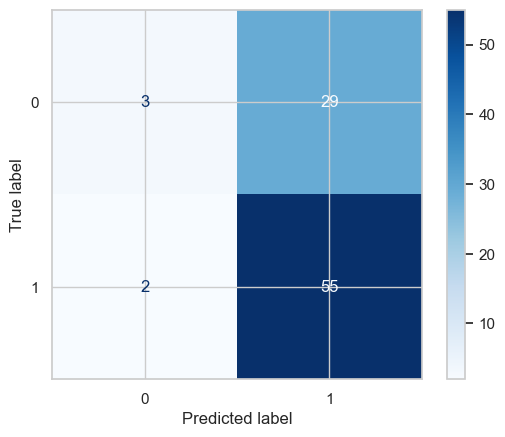


Kernel: rbf
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


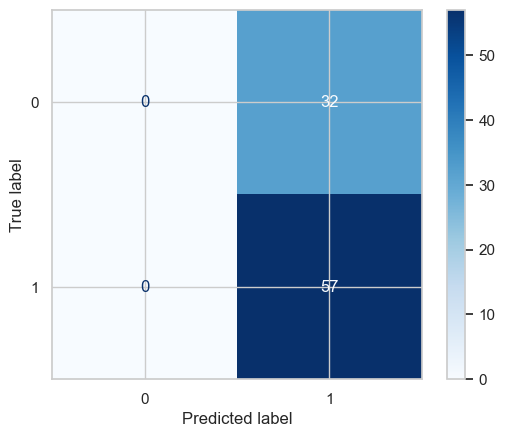


Kernel: sigmoid
Accuracy: 0.6292
              precision    recall  f1-score   support

           0       0.48      0.38      0.42        32
           1       0.69      0.77      0.73        57

    accuracy                           0.63        89
   macro avg       0.58      0.57      0.57        89
weighted avg       0.61      0.63      0.62        89



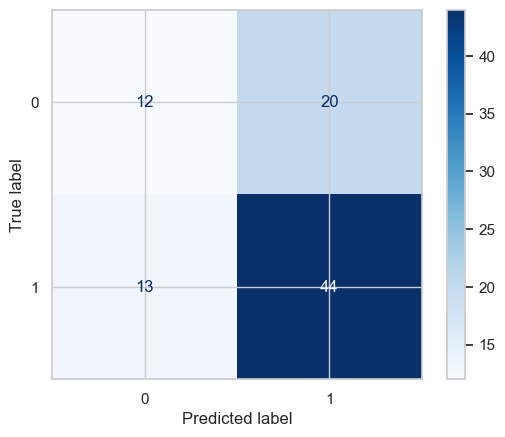

In [58]:
svm(X_train,X_test, y_train,y_test)


### **Kernel: Linear**
- **Accuracy**: 0.6404
- **Precision, Recall, F1-Score**:
  - **Class 0**: Precision, recall, and F1-score are all 0, meaning the model completely fails to identify any instances of class `0`.
  - **Class 1**: High recall (1.00) indicates that the model correctly identifies all instances of class `1`, but the precision is moderate (0.64), implying false positives.
- **Conclusion**: The model is biased towards class `1`, completely ignoring class `0`.

### **Kernel: RBF**
- **Accuracy**: 0.6404
- **Precision, Recall, F1-Score**: Identical to the linear kernel.
  - The model again completely fails for class `0`, with the same high performance for class `1`.
- **Conclusion**: This kernel is similarly biased towards class `1`.

### **Kernel: Sigmoid**
- **Accuracy**: 0.6292
- **Precision, Recall, F1-Score**:
  - **Class 0**: Precision (0.48) and recall (0.38) show better performance for class `0` than linear and RBF kernels.
  - **Class 1**: Precision (0.69) and recall (0.77) indicate more balanced performance compared to the other kernels.
- **Conclusion**: The sigmoid kernel provides a more balanced result for both classes, but at a slight cost to overall accuracy.

### **Summary**:
- **Linear and RBF** kernels perform similarly, heavily biased towards class `1`, ignoring class `0`.
- **Sigmoid kernel** provides a better balance between the two classes, though its overall accuracy is slightly lower than the r handle imbalanced datasets.

# Apply pcs on most important features

Explained variance by each component: [0.43509288 0.12544636]


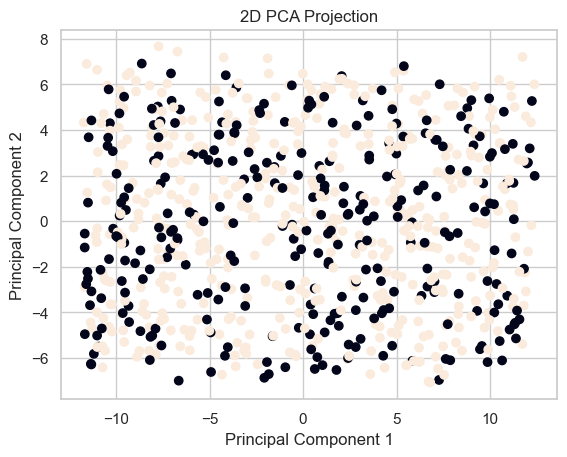

In [59]:
from sklearn.decomposition import PCA
# Step 1: Initialize PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization (or choose n_components for your case)

# Step 2: Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3: Check the amount of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

# Optional: Plot the 2D projection (if reducing to 2 components)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)  # Assuming y_train has the labels for color coding
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()


# check performance on most important features pca data


Kernel: linear
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


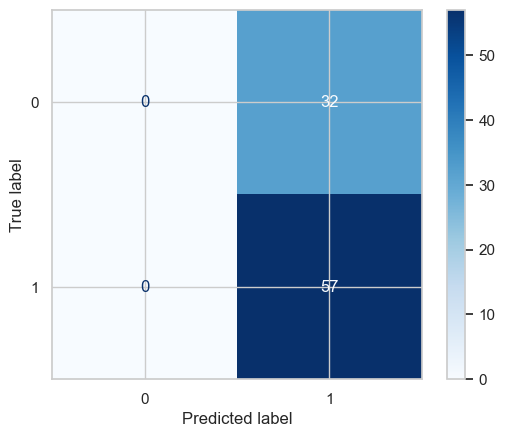


Kernel: poly
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


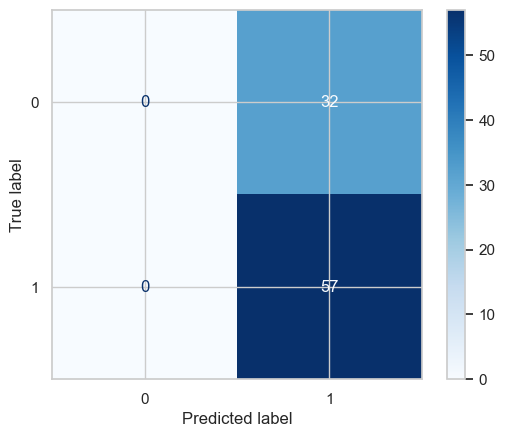


Kernel: rbf
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


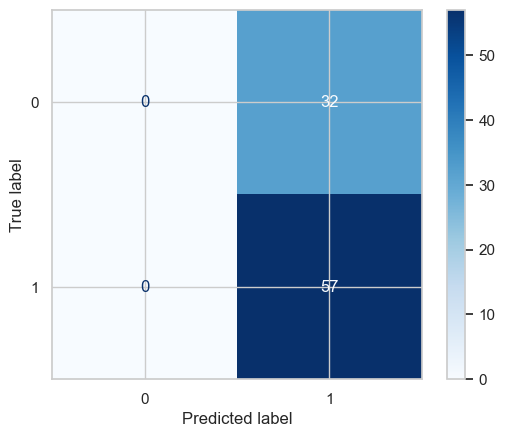


Kernel: sigmoid
Accuracy: 0.4944
              precision    recall  f1-score   support

           0       0.33      0.41      0.37        32
           1       0.62      0.54      0.58        57

    accuracy                           0.49        89
   macro avg       0.48      0.48      0.47        89
weighted avg       0.52      0.49      0.50        89



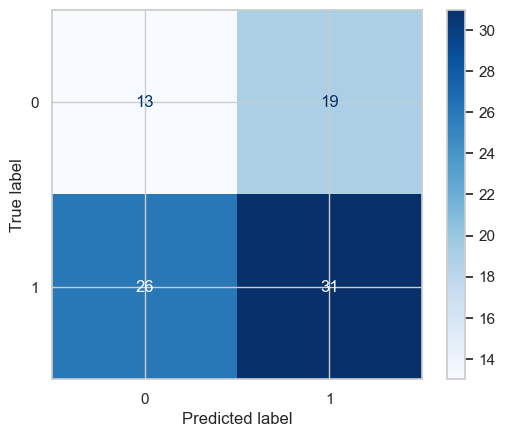

In [60]:
svm(X_train_pca,X_test_pca,y_train,y_test)


### **Kernel: Linear**
- **Accuracy**: 0.6404
- **Class 0 (32 samples)**:
  - Precision, Recall, F1-Score: All 0. The model completely fails to classify instances of class 0.
- **Class 1 (57 samples)**:
  - Precision: 0.64, Recall: 1.00, F1-Score: 0.78. The model perfectly identifies all instances of class 1.
- **Summary**: The linear kernel is heavily biased towards class 1, failing to identify class 0 entirely.

### **Kernel: Polynomial**
- **Accuracy**: 0.6404 (identical to linear kernel).
- **Class 0 (32 samples)**:
  - Precision, Recall, F1-Score: All 0, similar to the linear kernel.
- **Class 1 (57 samples)**:
  - Precision: 0.64, Recall: 1.00, F1-Score: 0.78. Same as the linear kernel.
- **Summary**: The polynomial kernel also suffers from bias toward class 1, identical to the linear kernel.

### **Kernel: RBF (Radial Basis Function)**
- **Accuracy**: 0.6404 (identical to linear and polynomial kernels).
- **Class 0 (32 samples)**:
  - Precision, Recall, F1-Score: All 0.
- **Class 1 (57 samples)**:
  - Precision: 0.64, Recall: 1.00, F1-Score: 0.78.
- **Summary**: The RBF kernel behaves similarly to the linear and polynomial kernels, heavily biased toward class 1.

### **Kernel: Sigmoid**
- **Accuracy**: 0.4944
- **Class 0 (32 samples)**:
  - Precision: 0.33, Recall: 0.41, F1-Score: 0.37. Shows improvement in identifying class 0 but with low precision and recall.
- **Class 1 (57 samples)**:
  - Precision: 0.62, Recall: 0.54, F1-Score: 0.58.
- **Summary**: The sigmoid kernel shows a more balanced classification but with a lower overall accuracy. It performs better for class 0 but sacr to improve performance across classes.

# check the performance of RandomForestClassifier model

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

# Assuming X_train and y_train are already defined

# Step 1: Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {i: weight for i, weight in zip(classes, class_weights)}

# Step 2: Create an array for sample weights
sample_weights = np.array([class_weight_dict[label] for label in y_train])

# Step 3: Create and fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train, sample_weight=sample_weights)

# Step 4: Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.22      0.31        32
           1       0.67      0.89      0.77        57

    accuracy                           0.65        89
   macro avg       0.60      0.56      0.54        89
weighted avg       0.62      0.65      0.60        89

[[ 7 25]
 [ 6 51]]


# Apply resample technique to balance data 

In [62]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = data[data['class'] == 0]
minority_class = data[data['class'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class, 
                                replace=True,     # Sample with replacement
                                n_samples=len(majority_class),  # Match majority class size
                                random_state=42)  # Reproducibility

# Combine the majority and oversampled minority class
balanced_data = pd.concat([majority_class, minority_oversampled])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)


# Apply the svm on resampled balanced data

In [63]:
X = data.drop(['class'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


Kernel: linear
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


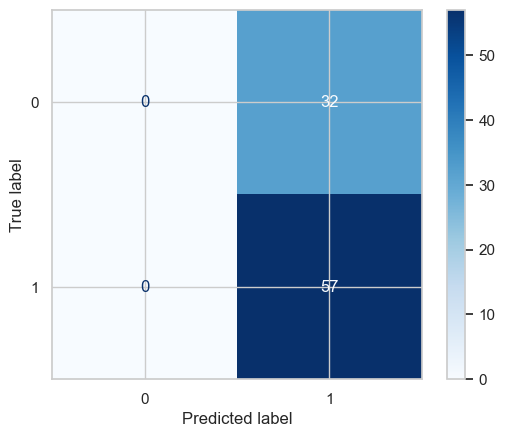


Kernel: poly
Accuracy: 0.6517
              precision    recall  f1-score   support

           0       0.67      0.06      0.11        32
           1       0.65      0.98      0.78        57

    accuracy                           0.65        89
   macro avg       0.66      0.52      0.45        89
weighted avg       0.66      0.65      0.54        89



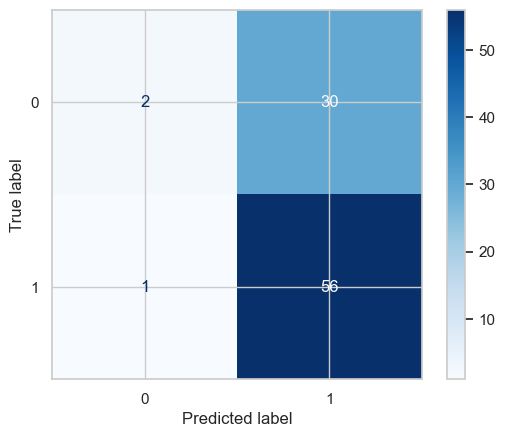


Kernel: rbf
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.64      1.00      0.78        57

    accuracy                           0.64        89
   macro avg       0.32      0.50      0.39        89
weighted avg       0.41      0.64      0.50        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


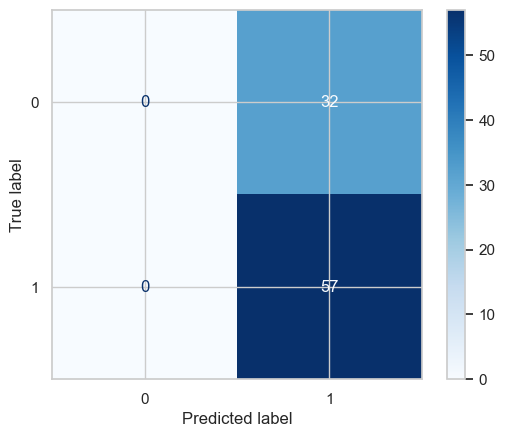


Kernel: sigmoid
Accuracy: 0.5056
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        32
           1       0.61      0.65      0.63        57

    accuracy                           0.51        89
   macro avg       0.45      0.45      0.45        89
weighted avg       0.49      0.51      0.50        89



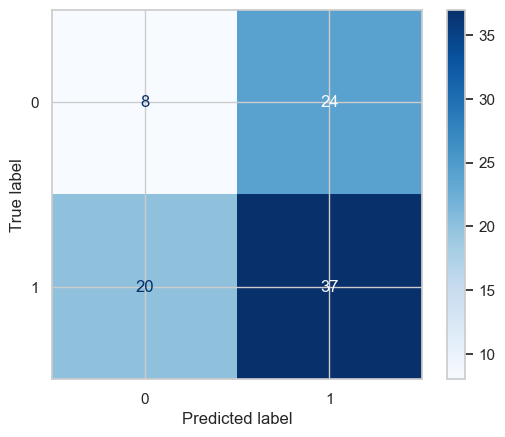

In [64]:
svm(X_train,X_test,y_train,y_test)

### **Kernel: Linear**
- **Accuracy**: 0.6404
- **Class 0 (32 samples)**:
  - Precision, Recall, F1-Score: All 0. The model completely fails to identify class 0.
- **Class 1 (57 samples)**:
  - Precision: 0.64, Recall: 1.00, F1-Score: 0.78. The model correctly classifies all instances of class 1.
- **Summary**: The linear kernel is heavily biased toward class 1, unable to detect any class 0 samples.

### **Kernel: Polynomial**
- **Accuracy**: 0.6517
- **Class 0 (32 samples)**:
  - Precision: 0.67, Recall: 0.06, F1-Score: 0.11. Slight improvement over the linear kernel in terms of class 0 detection, but still very low recall.
- **Class 1 (57 samples)**:
  - Precision: 0.65, Recall: 0.98, F1-Score: 0.78. The model performs similarly for class 1 as with the linear kernel.
- **Summary**: The polynomial kernel improves class 0 precision but struggles with recall, making it still highly biased toward class 1.

### **Kernel: RBF (Radial Basis Function)**
- **Accuracy**: 0.6404
- **Class 0 (32 samples)**:
  - Precision, Recall, F1-Score: All 0. No improvement for class 0 detection.
- **Class 1 (57 samples)**:
  - Precision: 0.64, Recall: 1.00, F1-Score: 0.78. The same as the linear kernel.
- **Summary**: Similar performance to the linear kernel, with no class 0 detection.

### **Kernel: Sigmoid**
- **Accuracy**: 0.5056
- **Class 0 (32 samples)**:
  - Precision: 0.29, Recall: 0.25, F1-Score: 0.27. The sigmoid kernel manages to detect more class 0 samples compared to other kernels but with low precision and recall.
- **Class 1 (57 samples)**:
  - Precision: 0.61, Recall: 0.65, F1-Score: 0.63. Performance is lower than other kernels for class 1.
- **Summary**: The sigmoid kernel balances class detection slightly better but sacrifices overall performance, leading to the lowest accuracy.
